<a href="https://colab.research.google.com/github/Appaji-Yadla/Flipkart_Product_Reviews/blob/main/Original_Sentiment_Analysis_of_Real_time_Flipkart_Product_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Sentiment Analysis of Real-time Flipkart Product Reviews**

**Objective:**
The objective of this project is to classify customer reviews as positive or negative and understand the pain points of customers who write negative reviews. By analyzing the sentiment of reviews, we aim to gain insights into product features that contribute to customer satisfaction or dissatisfaction.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science_Innomatics/Internship/Sentiment Analysis of Real-time Flipkart Product Reviews/reviews_badminton/data.csv')
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
df.shape

(8518, 8)

In [ ]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

In [ ]:
df.isnull().sum()

Reviewer Name       10
Review Title        10
Place of Review     50
Up Votes            10
Down Votes          10
Month              465
Review text          8
Ratings              0
dtype: int64

In [ ]:
df['Review text'].isnull().sum()

8

In [ ]:
df[df['Review text'].isnull()==True]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


No review for these columns we have to remove

In [ ]:
df['Review text'].dropna(inplace=True)

In [ ]:
df[df['Review text'].isnull()==True]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
8510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
8514,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
8515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
8516,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
8517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [ ]:
df = df[df['Review text'].notna()]

In [ ]:
df[df['Review text'].isnull()==True]

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings


In [ ]:
df.shape

(8510, 8)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8510 entries, 0 to 8509
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Reviewer Name    8508 non-null   object 
 1   Review Title     8508 non-null   object 
 2   Place of Review  8468 non-null   object 
 3   Up Votes         8508 non-null   float64
 4   Down Votes       8508 non-null   float64
 5   Month            8053 non-null   object 
 6   Review text      8510 non-null   object 
 7   Ratings          8510 non-null   int64  
dtypes: float64(2), int64(1), object(5)
memory usage: 598.4+ KB


In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,Feb 2021,"Nice product, good quality, but price is now r...",4
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,Feb 2021,They didn't supplied Yonex Mavis 350. Outside ...,1
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,Apr 2021,Worst product. Damaged shuttlecocks packed in ...,1
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaN,"Quite O. K. , but nowadays the quality of the...",3
4,ASHIK P A,Over priced,NaN,147.0,24.0,Apr 2016,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
df['Month']=pd.to_datetime(df['Month'], errors = 'coerce')
df['Month_Name']=df['Month'].dt.strftime('%B')
df['Year']=df['Month'].dt.year

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Month_Name,Year
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,2021-02-01,"Nice product, good quality, but price is now r...",4,February,2021.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...,1,February,2021.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,2021-04-01,Worst product. Damaged shuttlecocks packed in ...,1,April,2021.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaT,"Quite O. K. , but nowadays the quality of the...",3,NaN,NaN
4,ASHIK P A,Over priced,NaN,147.0,24.0,2016-04-01,Over pricedJust â?¹620 ..from retailer.I didn'...,1,April,2016.0


In [ ]:
df['Year'].value_counts()

2020.0    1918
2021.0    1774
2018.0    1606
2019.0    1356
2017.0     782
2022.0     561
2016.0      54
2015.0       2
Name: Year, dtype: int64

[]

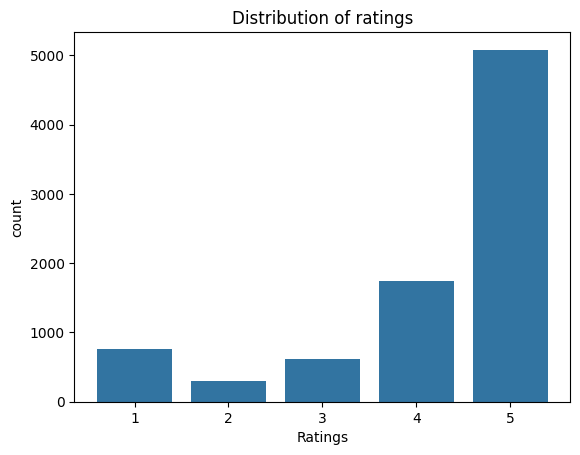

In [ ]:
fig = plt.figure()
sns.countplot(x='Ratings', data = df)
plt.title('Distribution of ratings')
plt.plot()


**Positive Reviews Dominant:** The majority of reviews for the YONEX MAVIS 350 Nylon Shuttle product appear to be positive, as indicated by the count plot. Positive ratings are often indicative of customer satisfaction with the product.

In [ ]:
grouped_data_1 = df['Up Votes'].groupby(df['Ratings']).sum()
grouped_data_1


Ratings
1     608.0
2      81.0
3      52.0
4    1186.0
5    1403.0
Name: Up Votes, dtype: float64

In [ ]:
grouped_data_2 = df['Down Votes'].groupby(df['Ratings']).sum()
grouped_data_2


Ratings
1    210.0
2     30.0
3     14.0
4    325.0
5    457.0
Name: Down Votes, dtype: float64

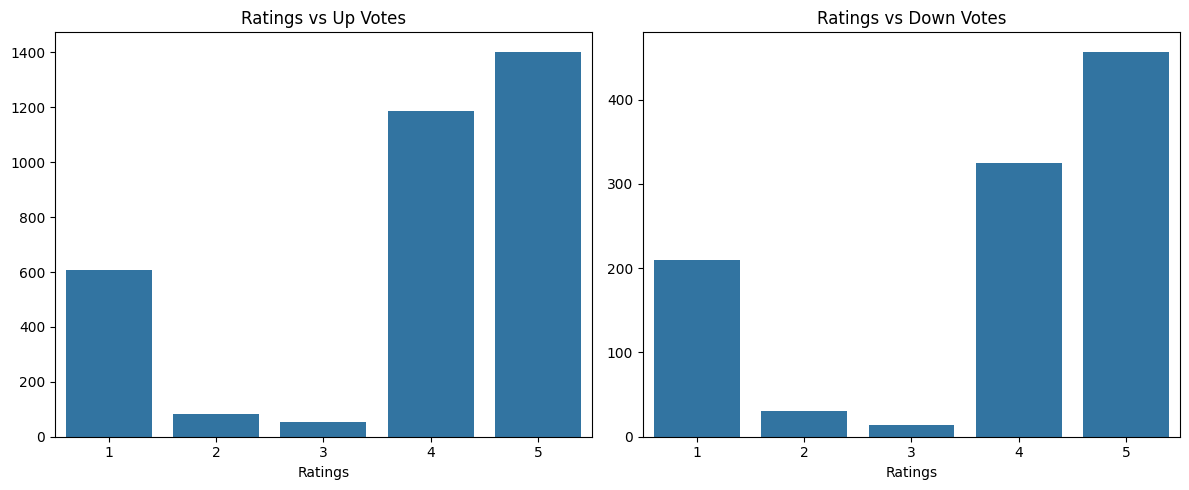

In [ ]:

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the sum of upvotes
sns.barplot(x=grouped_data_1.index, y=grouped_data_1.values, ax=axes[0])
axes[0].set_title('Ratings vs Up Votes')

# Plot the sum of downvotes
sns.barplot(x=grouped_data_2.index, y=grouped_data_2.values, ax=axes[1])
axes[1].set_title('Ratings vs Down Votes')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
grouped_data_3 =df['Ratings'].groupby(df['Year']).count()
grouped_data_3

Year
2015.0       2
2016.0      54
2017.0     782
2018.0    1606
2019.0    1356
2020.0    1918
2021.0    1774
2022.0     561
Name: Ratings, dtype: int64

In [ ]:
df['Year'].value_counts()

2020.0    1918
2021.0    1774
2018.0    1606
2019.0    1356
2017.0     782
2022.0     561
2016.0      54
2015.0       2
Name: Year, dtype: int64

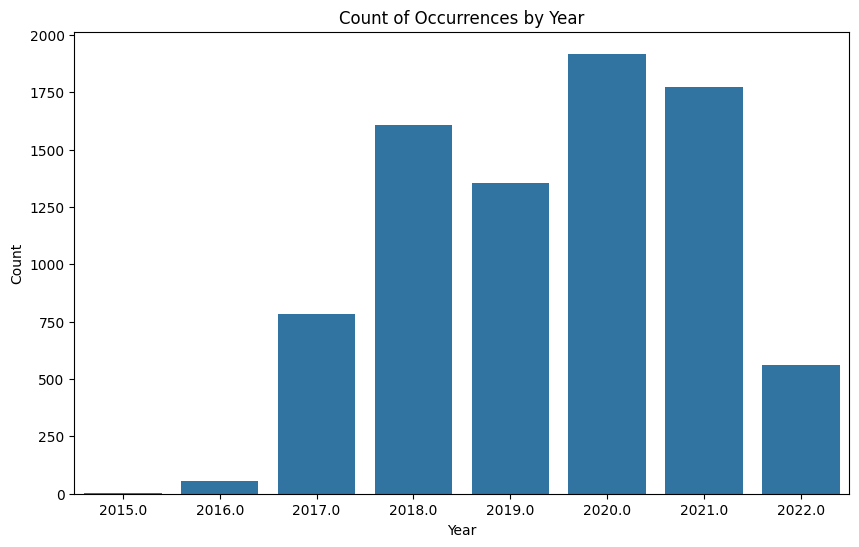

In [ ]:
# Create a count plot of the 'Year' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Year', data=df)

# Set title and labels
plt.title('Count of Occurrences by Year')
plt.xlabel('Year')
plt.ylabel('Count')

# Show the plot
plt.show()

The YONEX MAVIS 350 Nylon Shuttle might have gained popularity or remained consistently popular across the years 2018 to 2021.

Factors such as promotional events, discounts, or changes in the e-commerce platform's policies could have influenced the review submission patterns during these years.

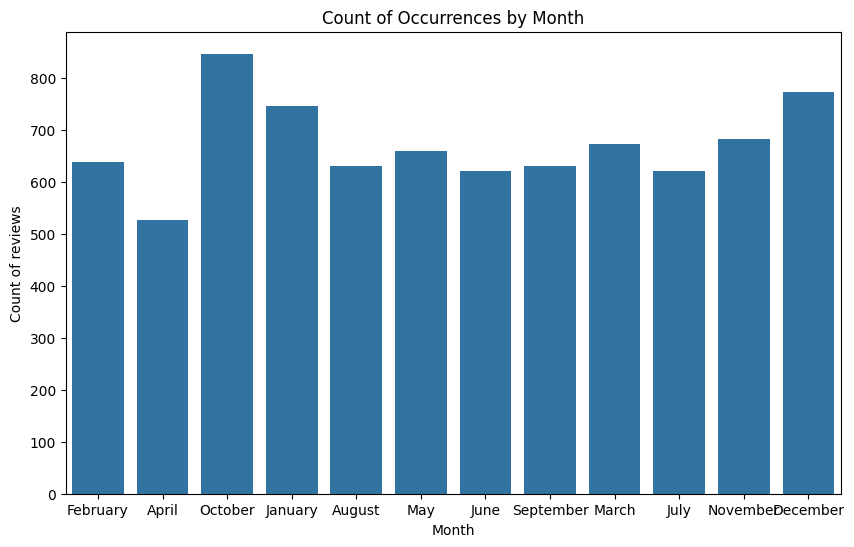

In [ ]:
# Create a count plot of the 'Year' column
plt.figure(figsize=(10, 6))
sns.countplot(x='Month_Name', data=df)

# Set title and labels
plt.title('Count of Occurrences by Month')
plt.xlabel('Month')
plt.ylabel('Count of reviews')

# Show the plot
plt.show()

The distribution of reviews across different months appears relatively even, suggesting consistent engagement throughout the year. However, October stands out with a slightly higher number of reviews, likely due to increased customer activity during this period, possibly due to Flipkart's Big Billion Days sale.

In [ ]:
df.head()

,Reviewer Name,Review Title,Place of Review,Up Votes,Down Votes,Month,Review text,Ratings,Month_Name,Year
0,Kamal Suresh,Nice product,"Certified Buyer, Chirakkal",889.0,64.0,2021-02-01,"Nice product, good quality, but price is now r...",4,February,2021.0
1,Flipkart Customer,Don't waste your money,"Certified Buyer, Hyderabad",109.0,6.0,2021-02-01,They didn't supplied Yonex Mavis 350. Outside ...,1,February,2021.0
2,A. S. Raja Srinivasan,Did not meet expectations,"Certified Buyer, Dharmapuri",42.0,3.0,2021-04-01,Worst product. Damaged shuttlecocks packed in ...,1,April,2021.0
3,Suresh Narayanasamy,Fair,"Certified Buyer, Chennai",25.0,1.0,NaT,"Quite O. K. , but nowadays the quality of the...",3,NaN,NaN
4,ASHIK P A,Over priced,NaN,147.0,24.0,2016-04-01,Over pricedJust â?¹620 ..from retailer.I didn'...,1,April,2016.0


In [ ]:
df=df[['Review Title', 'Up Votes', 'Down Votes', 'Review text', 'Ratings']]
df.head()

,Review Title,Up Votes,Down Votes,Review text,Ratings
0,Nice product,889.0,64.0,"Nice product, good quality, but price is now r...",4
1,Don't waste your money,109.0,6.0,They didn't supplied Yonex Mavis 350. Outside ...,1
2,Did not meet expectations,42.0,3.0,Worst product. Damaged shuttlecocks packed in ...,1
3,Fair,25.0,1.0,"Quite O. K. , but nowadays the quality of the...",3
4,Over priced,147.0,24.0,Over pricedJust â?¹620 ..from retailer.I didn'...,1


In [ ]:
# Concatenate 'Review Title' with 'Review text' using space as a separator
df = df.copy()
df['Review text'] = df['Review Title'].str.cat(df['Review text'], sep=' ')

# Drop the 'Review Title' column from the DataFrame
df.drop('Review Title', axis=1, inplace=True)

In [ ]:
df

,Up Votes,Down Votes,Review text,Ratings
0,889.0,64.0,"Nice product Nice product, good quality, but p...",4
1,109.0,6.0,Don't waste your money They didn't supplied Yo...,1
2,42.0,3.0,Did not meet expectations Worst product. Damag...,1
3,25.0,1.0,"Fair Quite O. K. , but nowadays the quality o...",3
4,147.0,24.0,Over priced Over pricedJust â?¹620 ..from reta...,1
...,...,...,...,...
8505,1.0,0.0,Very Good Delivered before time but price is h...,3
8506,0.0,2.0,Don't waste your money up to the mark but same...,4
8507,0.0,1.0,Really Nice Nice delivery speedREAD MORE,5
8508,NaN,NaN,NaN,5


In [ ]:
df.dropna(subset=['Review text'], inplace=True)


In [ ]:
df

,Up Votes,Down Votes,Review text,Ratings
0,889.0,64.0,"Nice product Nice product, good quality, but p...",4
1,109.0,6.0,Don't waste your money They didn't supplied Yo...,1
2,42.0,3.0,Did not meet expectations Worst product. Damag...,1
3,25.0,1.0,"Fair Quite O. K. , but nowadays the quality o...",3
4,147.0,24.0,Over priced Over pricedJust â?¹620 ..from reta...,1
...,...,...,...,...
8503,2.0,0.0,Yones Mavis 350 Blue cap Wrost and duplicate p...,1
8504,2.0,1.0,For Mavis350 Received product intact and seale...,5
8505,1.0,0.0,Very Good Delivered before time but price is h...,3
8506,0.0,2.0,Don't waste your money up to the mark but same...,4


In [ ]:
df.isnull().sum()

Up Votes       0
Down Votes     0
Review text    0
Ratings        0
dtype: int64

In [ ]:
words = '\n**********************************\n'.join(df['Review text'])

print(words[:5000])

Nice product Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.READ MORE
**********************************
Don't waste your money They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest....  Sad to hear this.READ MORE
**********************************
Did not meet expectations Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.READ MORE
**********************************
Fair Quite O. K. , but nowadays  the quality of the corks like not as before 3 to 5 years back.. I am using MAVIS 350 for more than 15 years quality of corks was very very good at that times, but now I am not getting the quality corks as like before, rate of corks also too much now, I am  very sorry to say like this, but in my experience , my Statme

An unncessary word READ MORE appear we have to remove.

In [ ]:
import re

# Define a function to replace multiple periods and remove "READ MORE"
def clean_review_text(text):
    cleaned_text = re.sub(r'READ MORE', '.', text)  # Remove "READ MORE" text
    cleaned_text = re.sub(r'\.{2,}', '.', cleaned_text)  # Replace multiple periods with a single period

    return cleaned_text

# Apply the function to the 'Review text' column
df['Review text'] = df['Review text'].apply(clean_review_text)


In [ ]:
words = '\n**********************************\n'.join(df['Review text'])

print(words[:2000])

Nice product Nice product, good quality, but price is now rising which is a bad sign. 800-850 was an affordable price, especially when we play everyday. So kindly help us out in terms of the price. Thank You.
**********************************
Don't waste your money They didn't supplied Yonex Mavis 350. Outside cover was Yonex Ad inside was a cheapest.  Sad to hear this.
**********************************
Did not meet expectations Worst product. Damaged shuttlecocks packed in new box. It's not a original yonex product. Don't buy.flipkart platform is chosen to fraud the buyers.
**********************************
Fair Quite O. K. , but nowadays  the quality of the corks like not as before 3 to 5 years back. I am using MAVIS 350 for more than 15 years quality of corks was very very good at that times, but now I am not getting the quality corks as like before, rate of corks also too much now, I am  very sorry to say like this, but in my experience , my Statment is very true to   my knowled

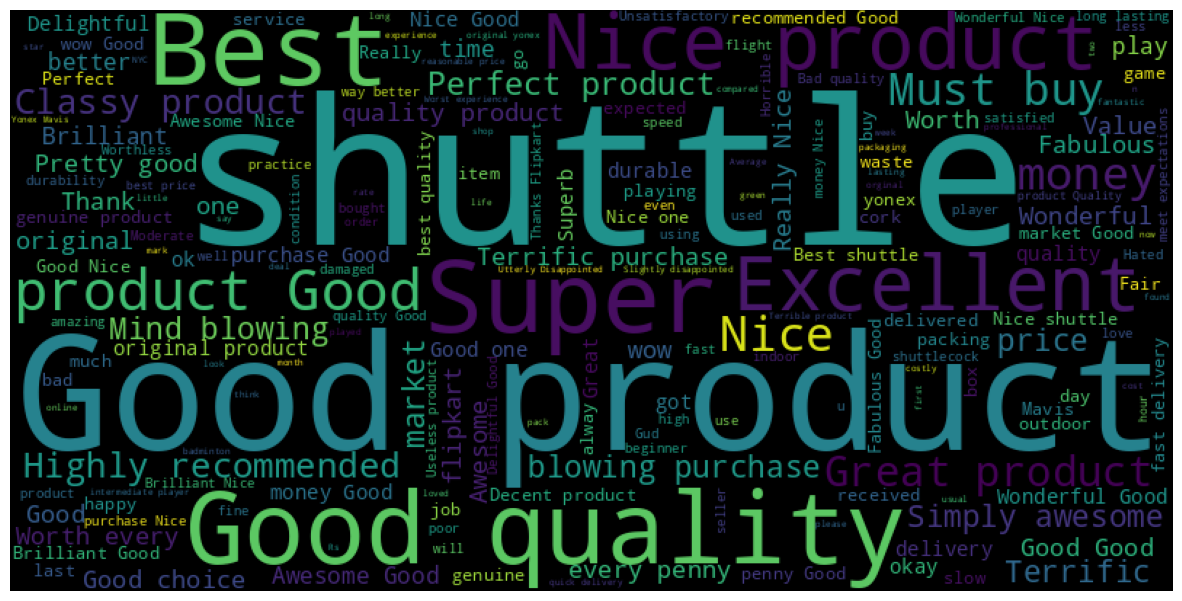

In [ ]:
from wordcloud import WordCloud
df1=df[(df['Ratings']==3) | (df['Ratings']==4) | (df['Ratings']==5)]
text = "\n".join(df1['Review text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')  # Hide axis
plt.show()

We can find that the Reviews with positive sentiment frequently involved some words like Good, Best, Super.

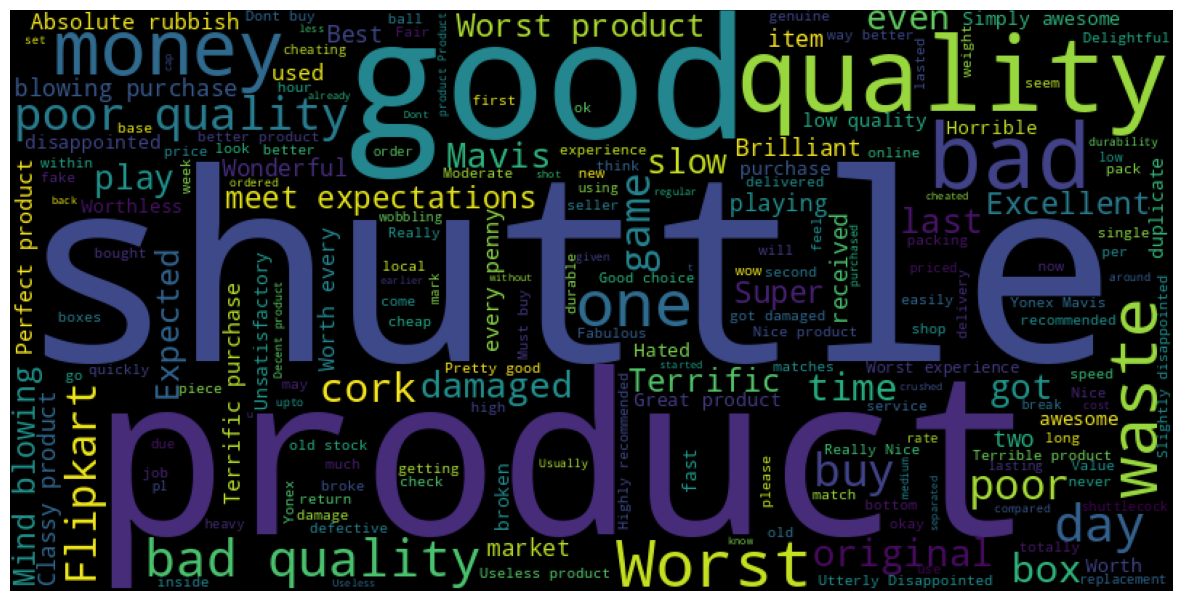

In [ ]:
from wordcloud import WordCloud
df2=df[(df['Ratings']==1) | (df['Ratings']==2)]
text = "\n".join(df2['Review text'])

# Generate a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)

# Display the word cloud
plt.figure(figsize=(15, 8))
plt.imshow(wordcloud)
plt.axis('off')  # Hide axis
plt.show()

We can find that the Reviews with negative sentiment frequently involved some words like worst, waste, bad, damaged, poor.

#**Data Preprocessing**

**Preprocessing steps:**

*   Removing special characters
*   Convert sentence into lower case
*   Remove Stop Words
*   Stemming or Lemmatization

In [ ]:
df.head()

,Up Votes,Down Votes,Review text,Ratings
0,889.0,64.0,"Nice product Nice product, good quality, but p...",4
1,109.0,6.0,Don't waste your money They didn't supplied Yo...,1
2,42.0,3.0,Did not meet expectations Worst product. Damag...,1
3,25.0,1.0,"Fair Quite O. K. , but nowadays the quality o...",3
4,147.0,24.0,Over priced Over pricedJust â?¹620 .from retai...,1


Consider 1 and 2 as Negative
3, 4, and 5 as positive

In [ ]:
# Replace ratings 1 and 2 with 0
df['Ratings'] = df['Ratings'].replace({1: 0, 2: 0})

# Replace ratings 3, 4, and 5 with 1
df['Ratings'] = df['Ratings'].replace({3: 1, 4: 1, 5: 1})


In [ ]:
# Split the data into features (X) and target variable (y)
X = df.drop('Ratings', axis = 1)
y=df['Ratings']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [ ]:
X_train.shape, X_test.shape

((6806, 3), (1702, 3))

In [ ]:
X_train.head()

,Up Votes,Down Votes,Review text
3473,0.0,0.0,Worth every penny Well Packed and very quickly...
4964,0.0,0.0,Really Nice good.
6460,0.0,0.0,Nice product Good product.
2035,0.0,0.0,Nice product Super it's good for playing.
1775,0.0,0.0,"Must buy! Excellent flight, perfect for daily ..."


In [ ]:
X_train['Up Votes'].value_counts()

0.0      6630
1.0       100
2.0        26
3.0        15
4.0         7
5.0         3
8.0         2
22.0        2
11.0        1
59.0        1
12.0        1
57.0        1
9.0         1
14.0        1
124.0       1
146.0       1
109.0       1
19.0        1
30.0        1
50.0        1
6.0         1
889.0       1
17.0        1
7.0         1
24.0        1
403.0       1
13.0        1
147.0       1
216.0       1
Name: Up Votes, dtype: int64

In [ ]:
import re
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()
## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [ ]:
clean_review_text =[]
review_text_length=[]

In [ ]:
clean_review_text =[]
review_text_length=[]

def preprocessor(text, flag):
  # Removing special characters and digits
  letters_only = re.sub("[^a-zA-Z]", " ", text)

  # change sentence to lower case
  letters_only = letters_only.lower()

  # tokenize into words
  words = letters_only.split()

  # remove stop words
  words = [word for word in words if not word in stopwords.words("english")]

  #Stemming/Lemmatization
  if (flag == 'stem'):
    words = [stemmer.stem(word) for word in words]
  else:
    words = [lemmatizer.lemmatize(word) for word in words]

  clean_review_text.append(" ".join(words))
  review_text_length.append(len(words))

In [ ]:
from tqdm import tqdm, tqdm_notebook

tqdm.pandas()

In [ ]:
clean_review_text =[]
review_text_length=[]
X_train['Review text'].progress_apply(lambda x: preprocessor(x, 'lemma'))
X_train['clean_review_text'] = clean_review_text
X_train['review_text_length'] = review_text_length

100%|██████████| 6806/6806 [00:05<00:00, 1152.92it/s]


In [ ]:
X_train.tail()

,Up Votes,Down Votes,Review text,clean_review_text,review_text_length
4217,0.0,0.0,Really Nice Xcellent product.,really nice xcellent product,4
6548,0.0,0.0,Mind-blowing purchase Quality as expected (goo...,mind blowing purchase quality expected good ma...,19
850,0.0,0.0,Fabulous! Good.,fabulous good,2
232,1.0,0.0,Hated it! Very worst.,hated worst,2
3499,0.0,0.0,Brilliant Super.,brilliant super,2


In [ ]:
clean_review_text =[]
review_text_length=[]
X_test['Review text'].progress_apply(lambda x: preprocessor(x, 'lemma'))
X_test['clean_review_text'] = clean_review_text
X_test['review_text_length'] = review_text_length

100%|██████████| 1702/1702 [00:02<00:00, 792.33it/s]


In [ ]:
X_test.tail()

,Up Votes,Down Votes,Review text,clean_review_text,review_text_length
7029,0.0,0.0,Excellent super.,excellent super,2
2448,0.0,0.0,Worth every penny Great product.,worth every penny great product,5
7673,0.0,0.0,Nice product Nothing.,nice product nothing,3
5292,0.0,0.0,Good quality product nice one good quality for...,good quality product nice one good quality price,8
3258,0.0,0.0,Could be way better Its normal and cool.,could way better normal cool,5


In [ ]:
X_train.isnull().sum()

Up Votes              0
Down Votes            0
Review text           0
clean_review_text     0
review_text_length    0
dtype: int64

In [ ]:
X_test.isnull().sum()

Up Votes              0
Down Votes            0
Review text           0
clean_review_text     0
review_text_length    0
dtype: int64

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on training data and transform it
X_train[['Up Votes', 'Down Votes']] = scaler.fit_transform(X_train[['Up Votes', 'Down Votes']])

# Transform the testing data using the scaler fitted on training data
X_test[['Up Votes', 'Down Votes']] = scaler.transform(X_test[['Up Votes', 'Down Votes']])


In [ ]:
X_train.head()

,Up Votes,Down Votes,Review text,clean_review_text,review_text_length
3473,-0.031016,-0.034613,Worth every penny Well Packed and very quickly...,worth every penny well packed quickly delivere...,11
4964,-0.031016,-0.034613,Really Nice good.,really nice good,3
6460,-0.031016,-0.034613,Nice product Good product.,nice product good product,4
2035,-0.031016,-0.034613,Nice product Super it's good for playing.,nice product super good playing,5
1775,-0.031016,-0.034613,"Must buy! Excellent flight, perfect for daily ...",must buy excellent flight perfect daily practice,7


In [ ]:
X_train.isnull().sum()

Up Votes              0
Down Votes            0
Review text           0
clean_review_text     0
review_text_length    0
dtype: int64

#**Bag of Words**

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vocab = CountVectorizer(ngram_range=(1,2))

X_train_BOW = vocab.fit_transform(X_train['clean_review_text'])
X_test_BOW = vocab.transform(X_test['clean_review_text'])

In [ ]:
# Convert the BOW matrix to a DataFrame and concatenate with Up Votes and Down Votes columns
X_train_bow_df = pd.DataFrame(X_train_BOW.toarray(), columns=vocab.get_feature_names_out(), index=X_train.index)
X_train_bow_df[['Up Votes', 'Down Votes']] = X_train[['Up Votes', 'Down Votes']]

In [ ]:
X_train_bow_df.head()

,aa,aa gya,aapke,aapke yaha,absence,absence mavis,absolute,absolute cheating,absolute rubbish,absolute treasure,...,youtube vd,yr,yr durability,yr good,yr got,yr shuttle,zero,zero star,Up Votes,Down Votes
3473,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
4964,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
6460,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
2035,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
1775,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613


In [ ]:
# Convert the BOW matrix to a DataFrame and concatenate with Up Votes and Down Votes columns
X_test_bow_df = pd.DataFrame(X_test_BOW.toarray(), columns=vocab.get_feature_names_out(), index=X_test.index)

X_test_bow_df[['Up Votes', 'Down Votes']] = X_test[['Up Votes', 'Down Votes']]


In [ ]:
X_test_bow_df.head()

,aa,aa gya,aapke,aapke yaha,absence,absence mavis,absolute,absolute cheating,absolute rubbish,absolute treasure,...,youtube vd,yr,yr durability,yr good,yr got,yr shuttle,zero,zero star,Up Votes,Down Votes
7277,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
2237,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
963,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
6328,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613
388,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,-0.031016,-0.034613


#**Model Building**

In [ ]:
from sklearn import metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_bow_df, y_train)

y_pred_LR = LR.predict(X_test_bow_df)
LR_Acc = metrics.accuracy_score(y_test, y_pred_LR)
LR_Acc

0.918331374853114

In [ ]:
from sklearn.metrics import f1_score

# Compute F1 score for training data
train_f1_score = f1_score(y_train, LR.predict(X_train_bow_df), average='weighted')

print("Train Score (F1 Score):", train_f1_score)


Train Score (F1 Score): 0.9642409798405995


In [ ]:
# Compute F1 score for testing data
train_f1_score = f1_score(y_test, y_pred_LR, average='weighted')

print("Train Score (F1 Score):", train_f1_score)

Train Score (F1 Score): 0.9104033062790664


In [ ]:
print(metrics.classification_report(y_test, y_pred_LR))

              precision    recall  f1-score   support

           0       0.77      0.50      0.60       214
           1       0.93      0.98      0.95      1488

    accuracy                           0.92      1702
   macro avg       0.85      0.74      0.78      1702
weighted avg       0.91      0.92      0.91      1702



In [ ]:
metrics.confusion_matrix(y_test, y_pred_LR)

array([[ 106,  108],
       [  31, 1457]])

Text(0.5, 23.52222222222222, 'Predicted')

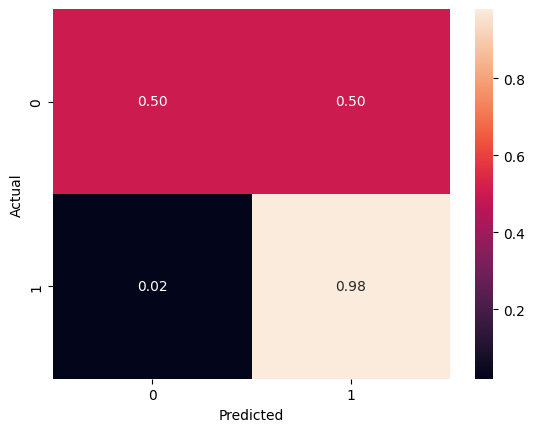

In [ ]:
cm = metrics.confusion_matrix(y_test, y_pred_LR)
actual = np.sum(cm, axis=1).reshape(-1, 1)
cmn = np.round(cm/actual, 2)

sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=LR.classes_, yticklabels=LR.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [ ]:
#K_NN Classifier
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(X_train_bow_df, y_train)

y_pred_KNN = KNN.predict(X_test_bow_df)
KNN_Acc = metrics.accuracy_score(y_test, y_pred_KNN)
KNN_Acc

0.8954171562867215

In [ ]:
print(metrics.classification_report(y_test, y_pred_KNN))

              precision    recall  f1-score   support

           0       0.78      0.23      0.36       214
           1       0.90      0.99      0.94      1488

    accuracy                           0.90      1702
   macro avg       0.84      0.61      0.65      1702
weighted avg       0.88      0.90      0.87      1702



In [ ]:
#DecisionTree Classifier
from sklearn.tree import DecisionTreeClassifier
DT = DecisionTreeClassifier()
DT.fit(X_train_bow_df, y_train)

y_pred_DT = DT.predict(X_test_bow_df)
DT_Acc = metrics.accuracy_score(y_test, y_pred_DT)
DT_Acc

0.8895417156286721

In [ ]:
print(metrics.classification_report(y_test, y_pred_DT))

              precision    recall  f1-score   support

           0       0.57      0.49      0.53       214
           1       0.93      0.95      0.94      1488

    accuracy                           0.89      1702
   macro avg       0.75      0.72      0.73      1702
weighted avg       0.88      0.89      0.89      1702



In [ ]:
#RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train_bow_df, y_train)

y_pred_RF = RF.predict(X_test_bow_df)
RF_Acc = metrics.accuracy_score(y_test, y_pred_RF)
RF_Acc

0.9071680376028202

In [ ]:
print(metrics.classification_report(y_test, y_pred_RF))

              precision    recall  f1-score   support

           0       0.72      0.43      0.54       214
           1       0.92      0.98      0.95      1488

    accuracy                           0.91      1702
   macro avg       0.82      0.70      0.74      1702
weighted avg       0.90      0.91      0.90      1702



In [ ]:
import warnings

warnings.filterwarnings('ignore')

In [ ]:
!pip install --upgrade scikit-learn

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Define text preprocessing function
def preprocessor(text):
    # Removing special characters and digits
    letters_only = re.sub("[^a-zA-Z]", " ", text)
    # change sentence to lower case
    letters_only = letters_only.lower()
    # tokenize into words
    words = letters_only.split()
    # remove stop words
    words = [word for word in words if word not in stopwords.words("english")]
    # Lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]
    return " ".join(words)

pipe = Pipeline([
    ('vectorization', CountVectorizer(preprocessor=preprocessor)),
    ('classifier', LogisticRegression(max_iter=5000))
])

# Define parameter grid for GridSearchCV
parameter_grid = {
    'vectorization__max_features': [1000, 1500, 2000],
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l2']
}

# Initialize GridSearchCV
clf = GridSearchCV(
    estimator=pipe,
    param_grid=parameter_grid,
    scoring='f1',
    cv=5,
    return_train_score=True,
    verbose=1
)

# Fit GridSearchCV
%time clf.fit(X_train['Review text'], y_train)

# Print best estimator
print("Best estimator found on train set")
print(clf.best_estimator_)
print()

# Print score on test data
print('Score on Test Data: ', clf.score(X_test['Review text'], y_test))


Fitting 5 folds for each of 9 candidates, totalling 45 fits
CPU times: user 7min 55s, sys: 1min 2s, total: 8min 57s
Wall time: 9min 31s
Best estimator found on train set
Pipeline(steps=[('vectorization',
                 CountVectorizer(max_features=1500,
                                 preprocessor=<function preprocessor at 0x7a2d33ef9bd0>)),
                ('classifier', LogisticRegression(C=1, max_iter=5000))])

Score on Test Data:  0.9507550886408405


In [ ]:
# Serialization
import joblib

best_model = clf.best_estimator_

joblib.dump(best_model, '/content/drive/MyDrive/Data Science_Innomatics/Internship/Sentiment Analysis of Real-time Flipkart Product Reviews/Models/logstic_model.pkl')

['/content/drive/MyDrive/Data Science_Innomatics/Internship/Sentiment Analysis of Real-time Flipkart Product Reviews/Models/logstic_model.pkl']

In [ ]:
import os
print("Model Size:", os.path.getsize(f'/content/drive/MyDrive/Data Science_Innomatics/Internship/Sentiment Analysis of Real-time Flipkart Product Reviews/Models/logstic_model.pkl'), "Bytes")

Model Size: 71885 Bytes


In [ ]:
print(metrics.classification_report(y_test, y_pred_LR))

In [ ]:
# from sklearn.pipeline import Pipeline
# from sklearn.feature_extraction.text import CountVectorizer
# from sklearn.linear_model import LogisticRegression
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.svm import SVC
# from sklearn.naive_bayes import GaussianNB
# from sklearn.model_selection import GridSearchCV
# import re
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# # Define text preprocessing function
# def preprocessor(text):
#     # Removing special characters and digits
#     letters_only = re.sub("[^a-zA-Z]", " ", text)
#     # change sentence to lower case
#     letters_only = letters_only.lower()
#     # tokenize into words
#     words = letters_only.split()
#     # remove stop words
#     words = [word for word in words if word not in stopwords.words("english")]
#     # Lemmatization
#     lemmatizer = WordNetLemmatizer()
#     words = [lemmatizer.lemmatize(word) for word in words]
#     return " ".join(words)

# # Create pipelines for all models
# pipelines = {
#     'logistic_regression': Pipeline([
#         ('vectorization', CountVectorizer(preprocessor=preprocessor)),
#         ('classifier', LogisticRegression())
#     ]),
#     'random_forest': Pipeline([
#         ('vectorization', CountVectorizer(preprocessor=preprocessor)),
#         ('classifier', RandomForestClassifier())
#     ]),
#     'svc': Pipeline([
#         ('vectorization', CountVectorizer(preprocessor=preprocessor)),
#         ('classifier', SVC())
#     ])
# }

# # Define parameter grids for all models
# param_grids = {
#     'logistic_regression': {
#         'vectorization__max_features': [1000, 1500, 2000],
#         'classifier__C': [0.1, 1, 10],
#         'classifier__penalty': ['l2']
#     },
#     'random_forest': {
#         'vectorization__max_features': [1000, 1500, 2000],
#         'classifier__n_estimators': [50, 100, 200]
#     },
#     'svc': {
#         'vectorization__max_features': [1000, 1500, 2000],
#         'classifier__kernel': ['linear', 'rbf'],
#         'classifier__C': [0.1, 1, 10]
#     }
# }

# # Perform GridSearchCV for all models
# best_models = {}

# for model_name, pipeline in pipelines.items():
#     print("*" * 10, model_name, "*" * 10)
#     grid_search = GridSearchCV(estimator=pipeline,
#                                param_grid=param_grids[model_name],
#                                scoring='f1_weighted',
#                                cv=5,
#                                return_train_score=True,
#                                verbose=1
#                                )

#     %time grid_search.fit(X_train['Review text'], y_train)

#     best_models[model_name] = grid_search.best_estimator_

#     print('Score on Test Data: ', grid_search.score(X_test['Review text'], y_test))
